Notebook used to debug problems with fftlength and plotting (which were resolved). See fitting_different_fftlength notebook for investigation of fftlength on recovered eccentricity, thinking about harmonic splitting and resolution. 

In [1]:
%%capture output
%run ~/ligo-surf-18/ECCENTRIC_POWER_DISTRIBUTIONS/SPECTROGRAM_POWERDIST_FUNCTIONS.ipynb
%run ~/ligo-surf-18/ECCENTRIC_POWER_DISTRIBUTIONS/function_genSpec_mywaveform_nogw.ipynb

In [2]:
# -- PARAMETERS --

# Mass (m1=m2):
m = 5

# Eccentricity:
e0 = 0.3

# Other params: 
P0 = 0.1
dt = 0.0001
dist = 3.086e24 #100 Mpc

# For spectrogram: 
theta = 0 
nMax = 15
fftlens = [0.25, 0.5, 1, 2]

In [3]:
# -- Generating spectrograms for different fftlengths -- 

specs_eccTD = {}
specs_mywaveform = {}

for fftlen in fftlens:
    
        print "fftlen = {}".format(fftlen)
    
        # Generate spectrograms
        spec_eccTD = genSpectrogram(e0, m, m, theta, fftlen=fftlen)
        print "Generated spectrogram from eccTD."
        spec_mywaveform = genSpec_mywaveform_nogw(P0,e0,m,m,dt,dist,fftlen=fftlen)
        print "Generated spectrogram from my waveform."
        print " "
        
        # Adding to dict 
        specs_eccTD[fftlen] = spec_eccTD
        specs_mywaveform[fftlen] = spec_mywaveform

fftlen = 0.25


/home/pycbc/pycbc-software/lib/python2.7/site-packages/gwpy/signal/fft/basic.py:51: UserWarning: no FFT method registered as 'welch', using 'pycbc_welch', please consider specifying this directly in the future
  name, regname))


Generated spectrogram from eccTD.
Generated spectrogram from my waveform.
 
fftlen = 0.5
Generated spectrogram from eccTD.
Generated spectrogram from my waveform.
 
fftlen = 1
Generated spectrogram from eccTD.
Generated spectrogram from my waveform.
 
fftlen = 2
Generated spectrogram from eccTD.
Generated spectrogram from my waveform.
 


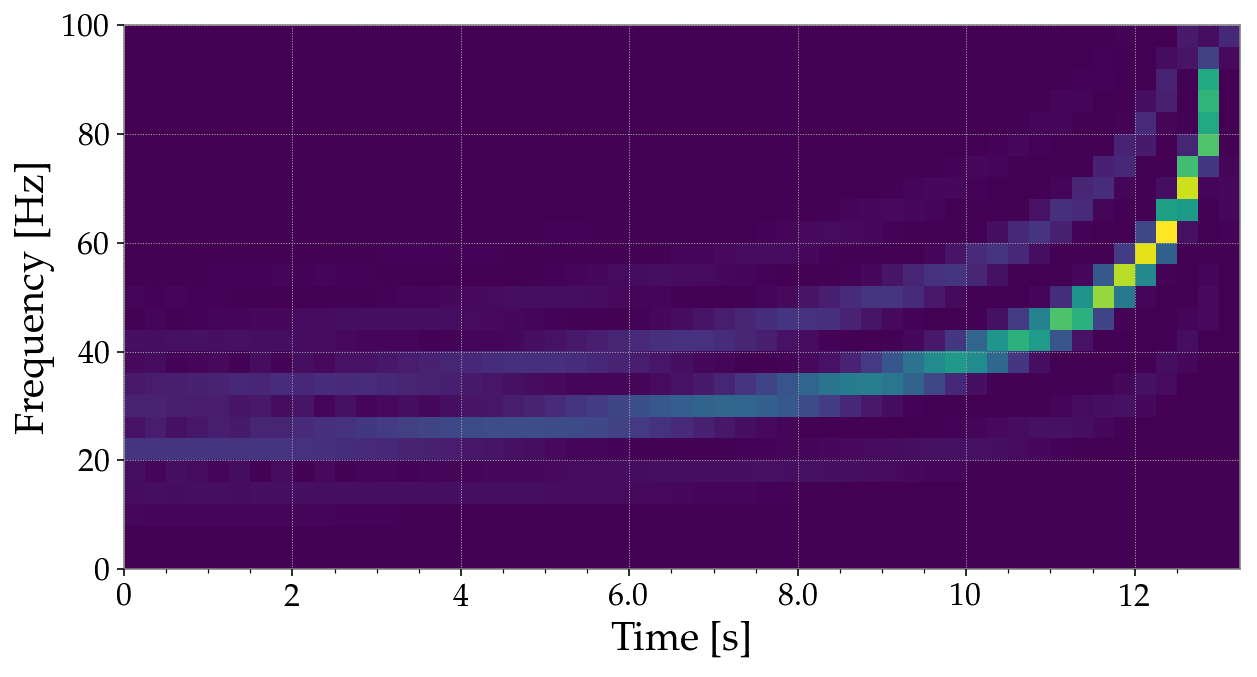

In [4]:
myplot = specs_eccTD[0.25].plot(figsize=(10,5), xscale='seconds')
myplot.xlabel = 'Time [s]'
myplot.ylim = (0, 100)

In [5]:
def axis_labels(x, no_labels):
    nx = x.shape[0]
    step_x = int(nx / (no_labels - 1)) # step between consecutive labels
    x_positions = np.arange(0,nx,step_x) # pixel count at label position
    x_labels = x[::step_x] # labels you want to see
    x_labels = np.round(x_labels,1)
    return x_positions, x_labels

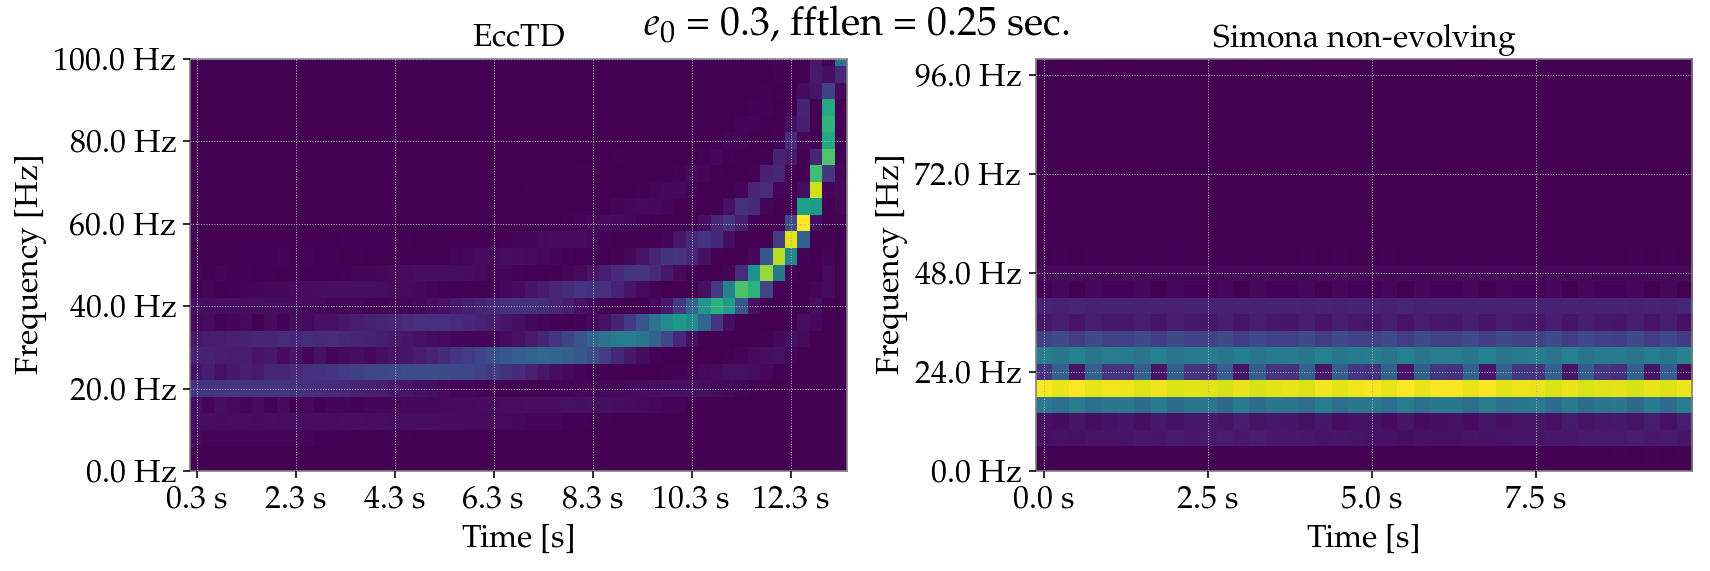

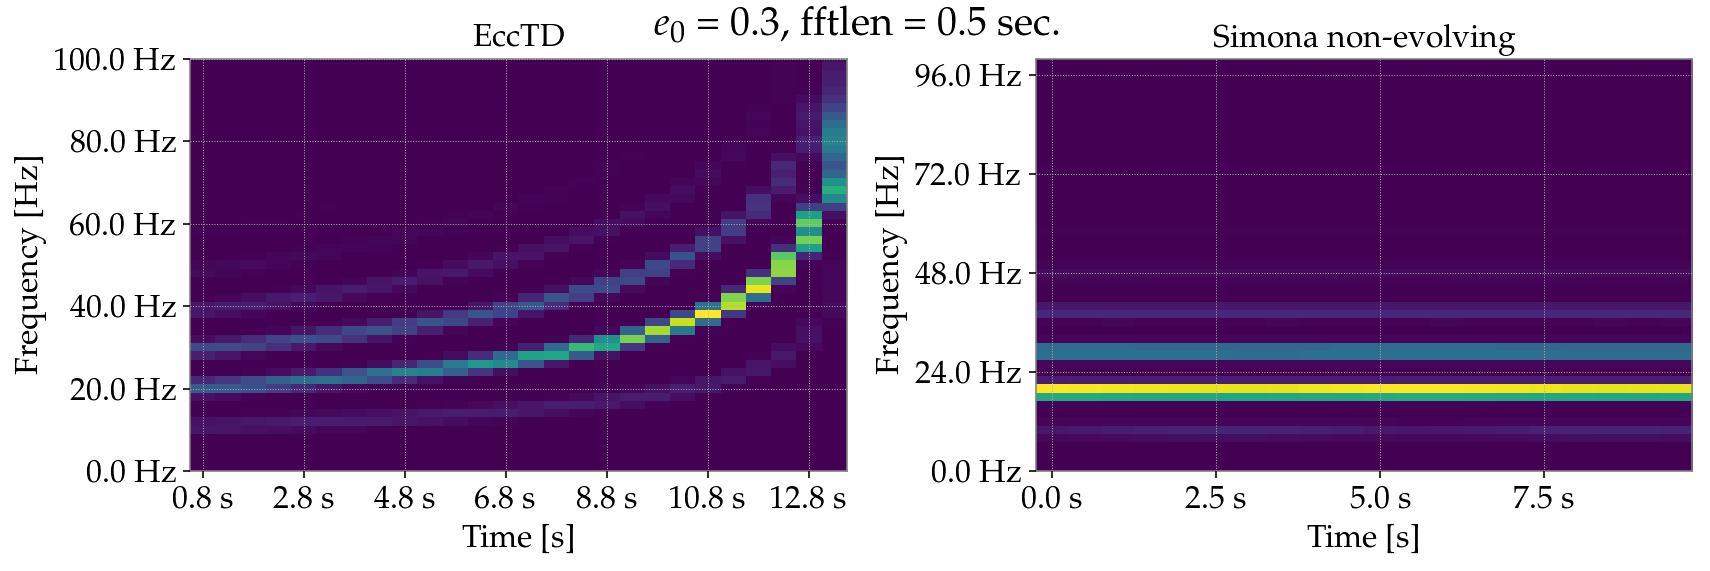

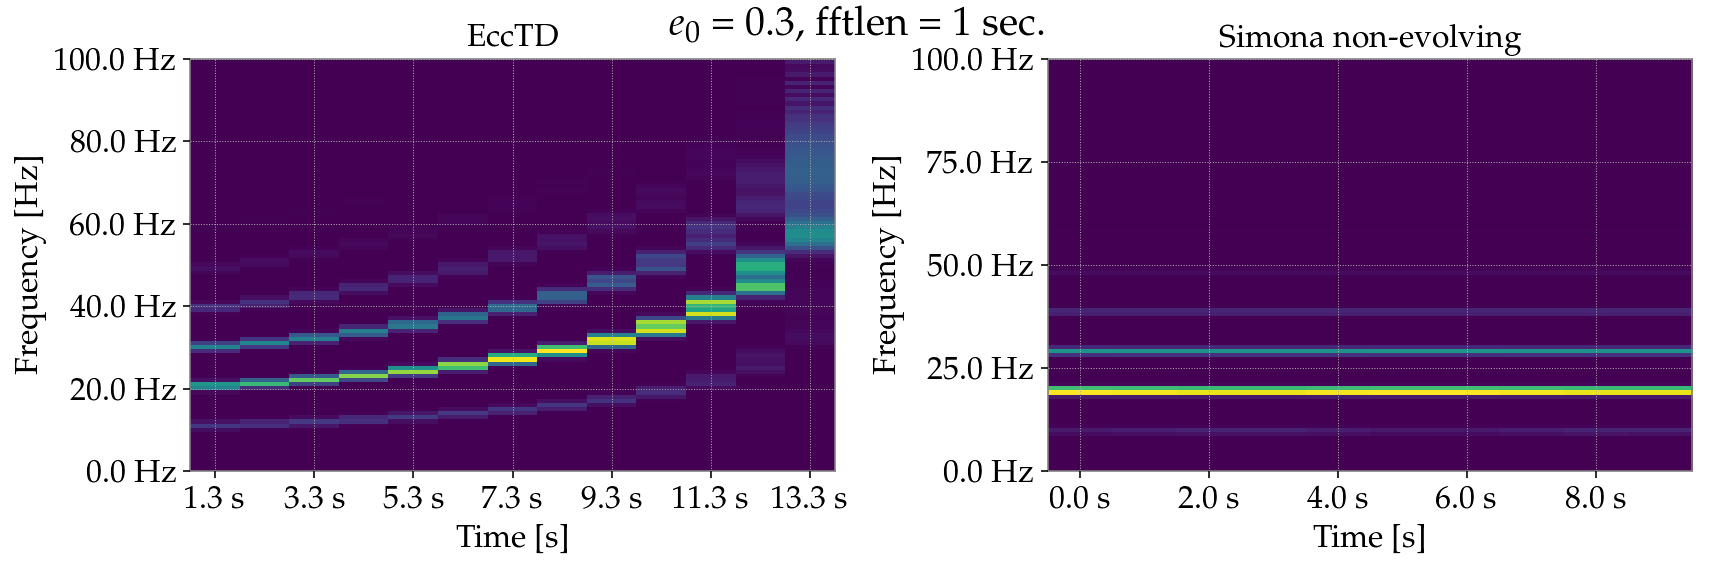

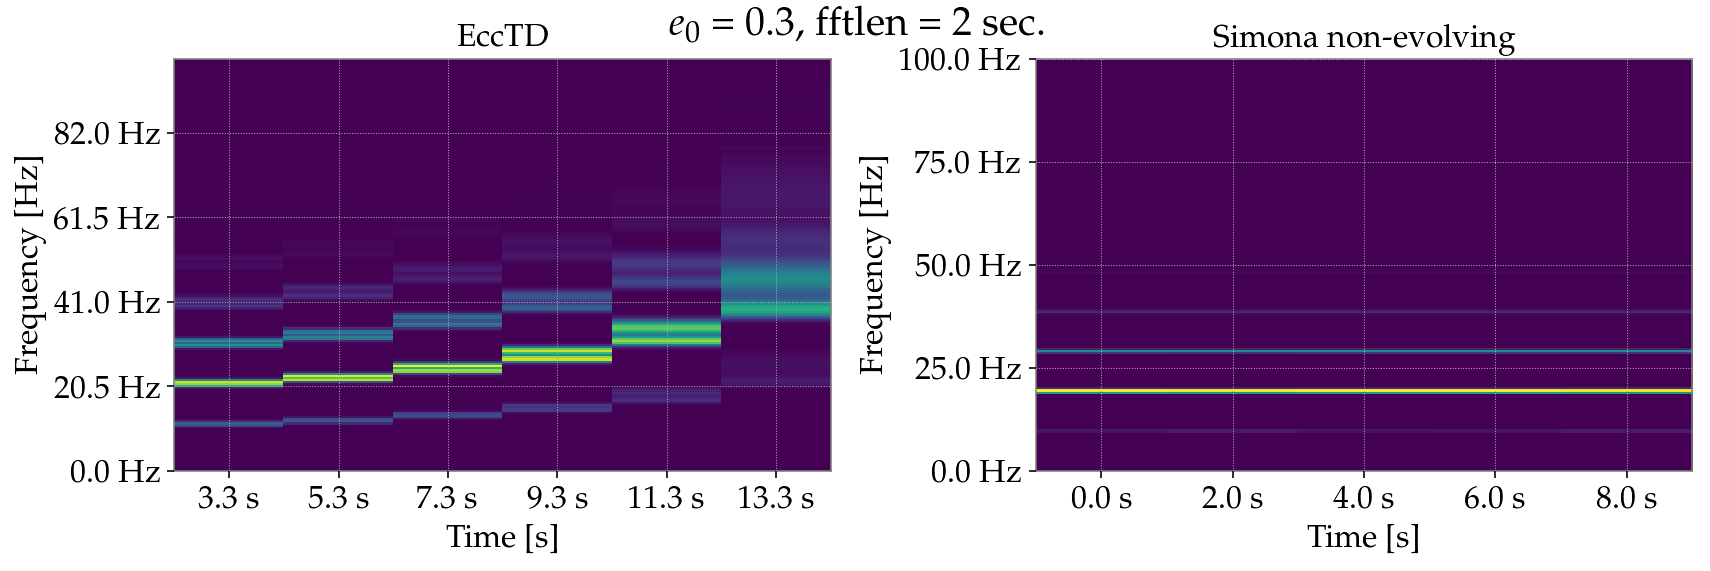

In [6]:
# -- Plotting -- 

for fftlen in fftlens:
    
    fig = plt.figure(figsize=(12,4))

    # Left subplots: from eccTD waveform
    ax1 = fig.add_subplot(121)
    s1 = np.transpose(np.asarray(specs_eccTD[fftlen]))
    spec1 = ax1.imshow(s1, aspect='auto')
    ax1.set_title("EccTD", fontsize=16)
    
    t = specs_eccTD[fftlen].times
    x_positions, x_labels = axis_labels(-1*t[::-1], 7)
    ax1.set_xticks(x_positions)
    ax1.set_xticklabels(x_labels)
    ax1.set_xlabel("Time [s]", fontsize=16)
    
    f = specs_eccTD[fftlen].frequencies
    y_positions, y_labels = axis_labels(f, 100)
    ax1.set_yticks(y_positions)
    ax1.set_yticklabels(y_labels)
    ax1.set_ylabel("Frequency [Hz]", fontsize=16)
    idx = np.where(f.value == 100)[0][0]
    ax1.set_ylim([0, idx])

    # Right subplots: from my non evolving waveform
    ax2 = fig.add_subplot(122)
    s2 = np.transpose(np.asarray(specs_mywaveform[fftlen]))
    spec2 = ax2.imshow(s2, aspect='auto')
    ax2.set_title("Simona non-evolving", fontsize=16)
    
    t2 = specs_mywaveform[fftlen].times
    x_positions2, x_labels2 = axis_labels(t2, 5)
    ax2.set_xticks(x_positions2)
    ax2.set_xticklabels(x_labels2)
    ax2.set_xlabel("Time [s]", fontsize=16)
    
    f2 = specs_mywaveform[fftlen].frequencies
    y_positions2, y_labels2 = axis_labels(f2, 200)
    ax2.set_yticks(y_positions2)
    ax2.set_yticklabels(y_labels2)
    ax2.set_ylabel("Frequency [Hz]", fontsize=16)
    idx2 = np.where(f2.value == 100)[0][0]
    ax2.set_ylim([0, idx2])
    
    plt.suptitle(r"$e_0$ = {}, fftlen = {} sec.".format(e0, fftlen), fontsize=20)
    plt.tight_layout()